/Users/juancamarena/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  1 of 1 completed


Economic Entropy (Stock Market Returns) for NVDA: 3.5326 bits


[*********************100%***********************]  1 of 1 completed


Economic Entropy (Stock Market Returns) for AAPL: 3.8301 bits


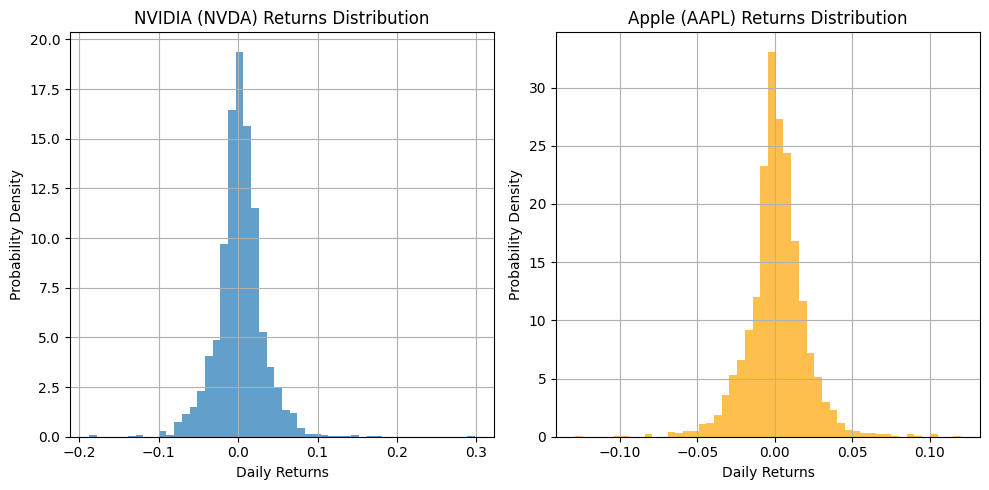

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def calculate_entropy(ticker, start_date, end_date):
    # Download historical stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate daily returns from the 'Adj Close' prices
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # Drop NaN values that result from the pct_change() calculation
    returns = stock_data['Returns'].dropna()

    # Compute the histogram of returns to get probabilities
    hist, bin_edges = np.histogram(returns, bins=50, density=True)

    # Normalize the histogram to create a probability distribution
    probabilities = hist / np.sum(hist)

    # Calculate Shannon entropy
    econ_entropy = entropy(probabilities, base=2)  # Use base 2 for bits

    return econ_entropy, returns

# Set the time period for comparison
start_date = "2015-01-01"
end_date = "2023-01-01"

# Calculate entropy for NVIDIA (NVDA)
nvda_entropy, nvda_returns = calculate_entropy("NVDA", start_date, end_date)
print(f"Economic Entropy (Stock Market Returns) for NVDA: {nvda_entropy:.4f} bits")

# Calculate entropy for Apple (AAPL)
aapl_entropy, aapl_returns = calculate_entropy("AAPL", start_date, end_date)
print(f"Economic Entropy (Stock Market Returns) for AAPL: {aapl_entropy:.4f} bits")

# Plot the stock returns distributions for comparison
plt.figure(figsize=(10, 5))

# Plot NVIDIA returns distribution
plt.subplot(1, 2, 1)
plt.hist(nvda_returns, bins=50, density=True, alpha=0.7, label='NVIDIA Returns Distribution')
plt.title("NVIDIA (NVDA) Returns Distribution")
plt.xlabel("Daily Returns")
plt.ylabel("Probability Density")
plt.grid(True)

# Plot Apple returns distribution
plt.subplot(1, 2, 2)
plt.hist(aapl_returns, bins=50, density=True, alpha=0.7, label='Apple Returns Distribution', color='orange')
plt.title("Apple (AAPL) Returns Distribution")
plt.xlabel("Daily Returns")
plt.ylabel("Probability Density")
plt.grid(True)

plt.tight_layout()
plt.show()
